# The Sparks Foundation - Data Science & Business Analytics Internship

## GRIP @ The Sparks Foundation

### By : Ahmed Rabie Saleh

## Task 7 Stock Market Prediction Using Numerical and Textual Analysis

#### the objective of the project is to create a hybrid model to predict the Stock market using numerical analysis for historical stock data and semantic analysis of Indian news data. 

# Steps   :

## Stock Market data
<ul>
<li>Import libraries</li>
<li>Read the data</li>
<li>Explore the data</li>
<li>visualize the data</li>
<li>Transforme from time series to supervised ML</li>
<li>Spliting the data to train and test</li>
<li>CNN Model</li> 
<li>LSTM Model</li> 
<li>make the prediction</li> 
<li>Evaluate the model</li>      
</ul>

## Indians News 
<ul>
<li>Read the data</li>
<li>Explore the data</li>
<li>Exploratory Data Analysis </li>
<li>Semantic Analysis</li>
</ul>

## Merge the Stock data and Indian News 
<ul>
<li>Merge the Stock data and Indian News</li>
<li>Spliting the data</li>
<li>Random Forest Regression model</li>
<li>Ada Boost Regression model</li>
<li>XG Boost Regression model</li>
<li>Decsion Tree Regression model </li>
<li>Conclusion</li>
</ul>



## Stock Market Prediction 

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import nltk
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras import optimizers
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error

In [2]:
 stock_df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/QMCI?period1=1420070400&period2=1646092800&interval=1d&events=history&includeAdjustedClose=true')

In [3]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,0.04,0.04,0.04,0.04,0.04,10000
1,2015-01-05,0.04,0.04,0.03,0.04,0.04,85900
2,2015-01-06,0.03,0.05,0.03,0.05,0.05,287300
3,2015-01-07,0.05,0.05,0.04,0.05,0.05,133500
4,2015-01-08,0.05,0.05,0.05,0.05,0.05,131200


## Exploratory Data Analysis 

In [4]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1802 non-null   object 
 1   Open       1802 non-null   float64
 2   High       1802 non-null   float64
 3   Low        1802 non-null   float64
 4   Close      1802 non-null   float64
 5   Adj Close  1802 non-null   float64
 6   Volume     1802 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 98.7+ KB


In [5]:
stock_df.shape

(1802, 7)

In [6]:
# convert form obeject to Datetime
stock_df['Date'] =pd.to_datetime(stock_df['Date']) 

In [7]:
stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1.802000e+03
mean,0.104767,0.109911,0.101504,0.107231,0.107231,4.191992e+04
std,0.056568,0.057478,0.054481,0.055099,0.055099,1.474864e+05
min,0.030000,0.030000,0.030000,0.030000,0.030000,0.000000e+00
25%,0.060000,0.060000,0.060000,0.060000,0.060000,0.000000e+00
50%,0.090000,0.100000,0.090000,0.100000,0.100000,6.150000e+03
75%,0.160000,0.160000,0.160000,0.160000,0.160000,4.070000e+04
max,0.390000,0.400000,0.270000,0.280000,0.280000,4.710100e+06


In [8]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,0.04,0.04,0.04,0.04,0.04,10000
1,2015-01-05,0.04,0.04,0.03,0.04,0.04,85900
2,2015-01-06,0.03,0.05,0.03,0.05,0.05,287300
3,2015-01-07,0.05,0.05,0.04,0.05,0.05,133500
4,2015-01-08,0.05,0.05,0.05,0.05,0.05,131200


## Visualize the data

<AxesSubplot:>

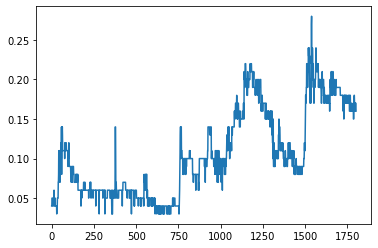

In [9]:
# plot the data 
stock_df['Close'].plot()

<AxesSubplot:>

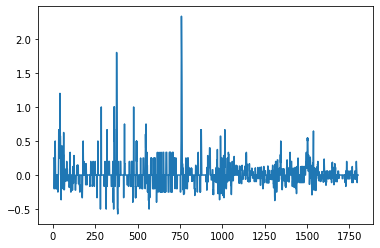

In [54]:
# translate from non_stationary to stationary
stock_df['Close'].pct_change(5).plot()

In [11]:
# returns_lag 1
returns = stock_df['Close'].diff(1)

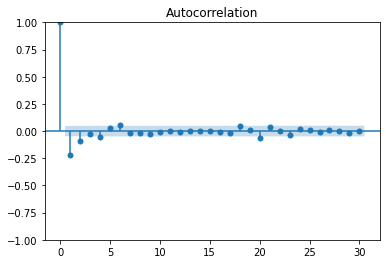

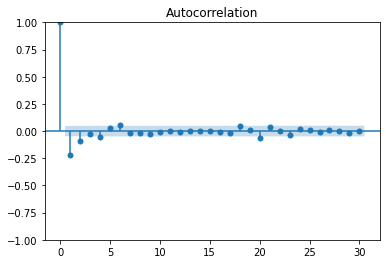

In [73]:
# plot the data using lags = 30
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(returns.dropna(), lags= 30, alpha=0.05)

In [74]:
from statsmodels.tsa.stattools import adfuller
summary = adfuller(returns.dropna())
summary

(-19.948375744008956,
 0.0,
 5,
 1795,
 {'1%': -3.4339982875683357,
  '5%': -2.863151515989605,
  '10%': -2.567627919165742},
 -11528.006517872986)

In [75]:
print('p_value = {}'.format(summary[1]))

p_value = 0.0


#### The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary

## Transforme from time series to supervised ML

In [76]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [60]:
close = stock_df['Close']
close = pd.DataFrame(close)

In [103]:
# forcasting for 30 day 
window = 29
lag =30
series = series_to_supervised(close, window=window, lag=lag)
series.head()

,Close(t-29),Close(t-28),Close(t-27),Close(t-26),Close(t-25),Close(t-24),Close(t-23),Close(t-22),Close(t-21),Close(t-20),...,Close(t-8),Close(t-7),Close(t-6),Close(t-5),Close(t-4),Close(t-3),Close(t-2),Close(t-1),Close(t),Close(t+30)
29,0.04,0.04,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.08
30,0.04,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.14
31,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.05,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.04,0.14
32,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.05,0.05,...,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.04,0.04,0.13
33,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.05,0.05,0.05,...,0.04,0.04,0.04,0.04,0.04,0.03,0.04,0.04,0.04,0.14


## Spliting the data to train and test

In [104]:
# Label
labels_col = 'Close(t+%d)' % lag
labels = series[labels_col]
series = series.drop(labels_col, axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(series, labels.values, test_size=0.4, random_state=0)
print('Train set shape', X_train.shape)
print('Validation set shape', X_test.shape)
X_train.head()

Train set shape (1045, 30)
Validation set shape (698, 30)


,Close(t-29),Close(t-28),Close(t-27),Close(t-26),Close(t-25),Close(t-24),Close(t-23),Close(t-22),Close(t-21),Close(t-20),...,Close(t-9),Close(t-8),Close(t-7),Close(t-6),Close(t-5),Close(t-4),Close(t-3),Close(t-2),Close(t-1),Close(t)
39,0.04,0.05,0.05,0.05,0.06,0.05,0.05,0.05,0.04,0.05,...,0.03,0.04,0.04,0.04,0.05,0.05,0.05,0.05,0.05,0.07
714,0.03,0.03,0.03,0.04,0.04,0.03,0.04,0.04,0.04,0.04,...,0.03,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
1177,0.22,0.21,0.20,0.20,0.20,0.20,0.20,0.18,0.18,0.18,...,0.20,0.20,0.20,0.20,0.20,0.20,0.22,0.22,0.21,0.21
534,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.05,...,0.05,0.04,0.05,0.04,0.04,0.04,0.04,0.05,0.05,0.05
1030,0.10,0.10,0.07,0.07,0.09,0.09,0.09,0.09,0.09,0.06,...,0.10,0.08,0.08,0.08,0.08,0.10,0.08,0.08,0.08,0.10


In [105]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_test_series.shape)

Train set shape (1045, 30, 1)
Validation set shape (698, 30, 1)


## CNN Model

In [106]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer='adam')
model_cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 29, 64)            192       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 14, 64)           0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 896)               0         
                                                                 
 dense_12 (Dense)            (None, 50)                44850     
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 45,093
Trainable params: 45,093
Non-trainable params: 0
__________________________________________________

In [107]:
cnn_history = model_cnn.fit(X_train_series, y_train, validation_data=(X_test_series, y_test), epochs=100, verbose=2)


Epoch 1/100
33/33 - 1s - loss: 0.0017 - val_loss: 8.3820e-04 - 524ms/epoch - 16ms/step
Epoch 2/100
33/33 - 0s - loss: 8.5664e-04 - val_loss: 8.1391e-04 - 144ms/epoch - 4ms/step
Epoch 3/100
33/33 - 0s - loss: 8.3185e-04 - val_loss: 8.0504e-04 - 148ms/epoch - 4ms/step
Epoch 4/100
33/33 - 0s - loss: 8.0298e-04 - val_loss: 7.8573e-04 - 127ms/epoch - 4ms/step
Epoch 5/100
33/33 - 0s - loss: 7.9734e-04 - val_loss: 7.8294e-04 - 131ms/epoch - 4ms/step
Epoch 6/100
33/33 - 0s - loss: 7.9191e-04 - val_loss: 8.2809e-04 - 133ms/epoch - 4ms/step
Epoch 7/100
33/33 - 0s - loss: 7.5618e-04 - val_loss: 7.7292e-04 - 131ms/epoch - 4ms/step
Epoch 8/100
33/33 - 0s - loss: 7.4517e-04 - val_loss: 7.7150e-04 - 125ms/epoch - 4ms/step
Epoch 9/100
33/33 - 0s - loss: 7.3807e-04 - val_loss: 8.6235e-04 - 126ms/epoch - 4ms/step
Epoch 10/100
33/33 - 0s - loss: 7.6568e-04 - val_loss: 7.7115e-04 - 121ms/epoch - 4ms/step
Epoch 11/100
33/33 - 0s - loss: 7.4405e-04 - val_loss: 7.8016e-04 - 124ms/epoch - 4ms/step
Epoch 12/10

Epoch 92/100
33/33 - 0s - loss: 5.6466e-04 - val_loss: 6.8623e-04 - 115ms/epoch - 3ms/step
Epoch 93/100
33/33 - 0s - loss: 5.4675e-04 - val_loss: 6.4381e-04 - 124ms/epoch - 4ms/step
Epoch 94/100
33/33 - 0s - loss: 5.8266e-04 - val_loss: 6.5106e-04 - 129ms/epoch - 4ms/step
Epoch 95/100
33/33 - 0s - loss: 5.7291e-04 - val_loss: 6.7085e-04 - 158ms/epoch - 5ms/step
Epoch 96/100
33/33 - 0s - loss: 5.5471e-04 - val_loss: 6.6104e-04 - 125ms/epoch - 4ms/step
Epoch 97/100
33/33 - 0s - loss: 5.3607e-04 - val_loss: 6.3298e-04 - 120ms/epoch - 4ms/step
Epoch 98/100
33/33 - 0s - loss: 5.2521e-04 - val_loss: 6.5591e-04 - 117ms/epoch - 4ms/step
Epoch 99/100
33/33 - 0s - loss: 5.4027e-04 - val_loss: 6.3723e-04 - 116ms/epoch - 4ms/step
Epoch 100/100
33/33 - 0s - loss: 5.2755e-04 - val_loss: 6.8639e-04 - 126ms/epoch - 4ms/step


## LSTM Model

In [110]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer='adam')
model_lstm.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                10400     
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [111]:
lstm_history = model_lstm.fit(X_train_series, y_train, validation_data=(X_test_series, y_test), epochs=100, verbose=2)

Epoch 1/100
33/33 - 2s - loss: 0.0049 - val_loss: 0.0013 - 2s/epoch - 47ms/step
Epoch 2/100
33/33 - 0s - loss: 0.0010 - val_loss: 9.1547e-04 - 418ms/epoch - 13ms/step
Epoch 3/100
33/33 - 0s - loss: 7.7275e-04 - val_loss: 7.7117e-04 - 394ms/epoch - 12ms/step
Epoch 4/100
33/33 - 0s - loss: 7.3401e-04 - val_loss: 7.9720e-04 - 405ms/epoch - 12ms/step
Epoch 5/100
33/33 - 0s - loss: 7.7157e-04 - val_loss: 7.5569e-04 - 387ms/epoch - 12ms/step
Epoch 6/100
33/33 - 0s - loss: 7.3788e-04 - val_loss: 7.6044e-04 - 435ms/epoch - 13ms/step
Epoch 7/100
33/33 - 0s - loss: 7.3104e-04 - val_loss: 7.5591e-04 - 373ms/epoch - 11ms/step
Epoch 8/100
33/33 - 0s - loss: 7.3436e-04 - val_loss: 7.6176e-04 - 408ms/epoch - 12ms/step
Epoch 9/100
33/33 - 0s - loss: 7.2524e-04 - val_loss: 7.5805e-04 - 401ms/epoch - 12ms/step
Epoch 10/100
33/33 - 0s - loss: 7.6224e-04 - val_loss: 7.6968e-04 - 394ms/epoch - 12ms/step
Epoch 11/100
33/33 - 0s - loss: 7.4571e-04 - val_loss: 7.8595e-04 - 395ms/epoch - 12ms/step
Epoch 12/100

Epoch 91/100
33/33 - 0s - loss: 6.8003e-04 - val_loss: 7.2283e-04 - 392ms/epoch - 12ms/step
Epoch 92/100
33/33 - 0s - loss: 6.8401e-04 - val_loss: 7.3228e-04 - 391ms/epoch - 12ms/step
Epoch 93/100
33/33 - 0s - loss: 6.7638e-04 - val_loss: 7.2103e-04 - 407ms/epoch - 12ms/step
Epoch 94/100
33/33 - 0s - loss: 6.9065e-04 - val_loss: 7.3312e-04 - 389ms/epoch - 12ms/step
Epoch 95/100
33/33 - 0s - loss: 6.8242e-04 - val_loss: 7.6303e-04 - 402ms/epoch - 12ms/step
Epoch 96/100
33/33 - 0s - loss: 6.8405e-04 - val_loss: 7.3038e-04 - 387ms/epoch - 12ms/step
Epoch 97/100
33/33 - 0s - loss: 6.7222e-04 - val_loss: 7.3142e-04 - 384ms/epoch - 12ms/step
Epoch 98/100
33/33 - 0s - loss: 6.7460e-04 - val_loss: 7.2133e-04 - 397ms/epoch - 12ms/step
Epoch 99/100
33/33 - 0s - loss: 7.0744e-04 - val_loss: 7.2914e-04 - 419ms/epoch - 13ms/step
Epoch 100/100
33/33 - 0s - loss: 6.9806e-04 - val_loss: 7.3983e-04 - 375ms/epoch - 11ms/step


## Prediction 

In [120]:
y_pred = model_lstm.predict(X_test)

In [121]:
# feature scaling for the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(close).reshape(-1,1))

In [116]:
train_predict=model_lstm.predict(X_train)
test_predict=model_lstm.predict(X_test)

In [117]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## Evaluate the model

Text(0, 0.5, 'MSE')

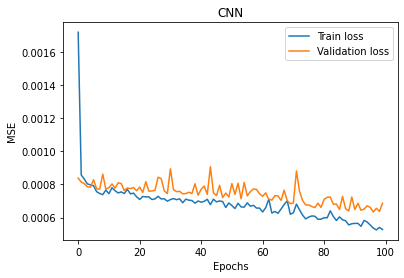

In [112]:
plt.plot(cnn_history.history['loss'], label='Train loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.title('CNN')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

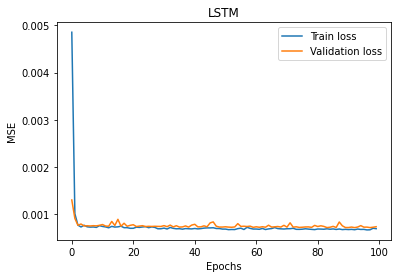

In [113]:
plt.plot(lstm_history.history['loss'], label='Train loss')
plt.plot(lstm_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [122]:
MSE_train = math.sqrt(mean_squared_error(y_train,train_predict))
MSE_test = math.sqrt(mean_squared_error(y_test,test_predict))
print ('mean_squared_error for the train data = {}'.format(MSE_train))
print ('mean_squared_error for the test data = {}'.format(MSE_test))

mean_squared_error for the train data = 0.07006510760757954
mean_squared_error for the test data = 0.06842711846718


# India News Headlines

In [36]:
# Reading the data
features_name=['Date','Category','News']
news_df = pd.read_csv('india-news-headlines.xls',names=features_name)

C:\Users\ahmed\anaconda3\envs\task_1_supervisedLearning\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
news_df.head(10)

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [38]:
news_df.drop(index=0,axis=0,inplace=True)

## Basic EDA

In [39]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Date      object
 1   Category  object
 2   News      object
dtypes: object(3)
memory usage: 104.5+ MB


In [40]:
news_df.isnull().sum()

Date        0
Category    0
News        0
dtype: int64

In [41]:
news_df.drop('Category', axis = 1, inplace=True)

In [42]:
# convert the date to datetime object
news_df['Date'] = pd.to_datetime(news_df['Date'],format='%Y%m%d')

In [43]:
# Group the headlines for each day
news_df['News'] = news_df.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news_df = news_df.drop_duplicates() 
news_df.reset_index(inplace=True,drop=True)
news_df.head()

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...


## Semantic Analysis

In [125]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [126]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

In [127]:
#Adding subjectivity and polarity columns
from textblob import TextBlob

news_df['Subjectivity'] = news_df['News'].apply(getSubjectivity)
news_df['Polarity'] = news_df['News'].apply(getPolarity)
news_df

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704
...,...,...,...,...,...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886,-0.9997,0.129,0.793
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775


In [132]:
df_merge['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_merge['News']]
df_merge['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_merge['News']]
df_merge['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_merge['News']]
df_merge['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_merge['News']]
df_merge

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Open,High,Low,Close,Adj Close,Volume,Positive
0,2015-01-02,Drink smart with these party tips How to say s...,0.455678,0.058540,-0.9997,0.145,0.740,0.04,0.04,0.04,0.04,0.04,10000,0.114
1,2015-01-05,Recipe: Strawberry cupcakes Recipe: Kaju jeera...,0.433587,0.097769,-0.9990,0.130,0.758,0.04,0.04,0.03,0.04,0.04,85900,0.112
2,2015-01-06,Turn to gardening for happiness Teeth jeweller...,0.386579,0.055777,-0.9997,0.117,0.804,0.03,0.05,0.03,0.05,0.05,287300,0.079
3,2015-01-07,Can ex-lovers be friends? Is water diet bad fo...,0.385529,0.033072,-1.0000,0.169,0.745,0.05,0.05,0.04,0.05,0.05,133500,0.086
4,2015-01-08,How to do a home manicure Recipe: Spiced beetr...,0.408689,0.061495,-0.9999,0.144,0.774,0.05,0.05,0.05,0.05,0.05,131200,0.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,2020-12-24,How to set the mood for sex during cold winter...,0.390942,0.048166,-0.9989,0.094,0.838,0.18,0.18,0.17,0.18,0.18,179600,0.067
1507,2020-12-28,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768,0.21,0.21,0.19,0.19,0.19,449100,0.093
1508,2020-12-29,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754,0.20,0.20,0.17,0.19,0.19,149600,0.096
1509,2020-12-30,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775,0.20,0.22,0.18,0.22,0.22,173400,0.081


# Merging the stock data and the Indian news data

In [131]:
df_merge = pd.merge(news_df,stock_df, how='inner', on='Date')
df_merge.head()

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,Drink smart with these party tips How to say s...,0.455678,0.058540,-0.9997,0.145,0.740,0.04,0.04,0.04,0.04,0.04,10000
1,2015-01-05,Recipe: Strawberry cupcakes Recipe: Kaju jeera...,0.433587,0.097769,-0.9990,0.130,0.758,0.04,0.04,0.03,0.04,0.04,85900
2,2015-01-06,Turn to gardening for happiness Teeth jeweller...,0.386579,0.055777,-0.9997,0.117,0.804,0.03,0.05,0.03,0.05,0.05,287300
3,2015-01-07,Can ex-lovers be friends? Is water diet bad fo...,0.385529,0.033072,-1.0000,0.169,0.745,0.05,0.05,0.04,0.05,0.05,133500
4,2015-01-08,How to do a home manicure Recipe: Spiced beetr...,0.408689,0.061495,-0.9999,0.144,0.774,0.05,0.05,0.05,0.05,0.05,131200


In [134]:
final_df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]
final_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.04,0.455678,0.058540,-0.9997,0.145,0.740,0.114
1,0.04,0.433587,0.097769,-0.9990,0.130,0.758,0.112
2,0.05,0.386579,0.055777,-0.9997,0.117,0.804,0.079
3,0.05,0.385529,0.033072,-1.0000,0.169,0.745,0.086
4,0.05,0.408689,0.061495,-0.9999,0.144,0.774,0.083


In [135]:
# feature scaling for the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
hybrid_df = pd.DataFrame(scaler.fit_transform(final_df))
hybrid_df.columns = final_df.columns
hybrid_df.index = final_df.index
hybrid_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.052632,0.880401,0.441347,0.00015,0.460317,0.279221,0.516949
1,0.052632,0.722400,0.652796,0.00050,0.341270,0.396104,0.500000
2,0.105263,0.386186,0.426457,0.00015,0.238095,0.694805,0.220339
3,0.105263,0.378678,0.304075,0.00000,0.650794,0.311688,0.279661
4,0.105263,0.544322,0.457276,0.00005,0.452381,0.500000,0.254237


## Spliting the data 

In [136]:
y = hybrid_df.iloc[:,0]

In [137]:
hybrid_df.drop('Close',axis=1,inplace=True)

In [142]:
X = hybrid_df.copy()

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


## Random Forest Regressor

### Find optimal parameters for the model using GridSearchCV

In [155]:
from sklearn.model_selection import GridSearchCV
random_forest = RandomForestRegressor()
param_grid = {'criterion': ['squared_error','absolute_error', 'poisson'],
              'max_features': [None, 'auto', 'sqrt', 'log2'],
              'max_depth': [None,1,5,10],
              'min_samples_split': [2, 5, 10],
              'random_state': [42]}
random_forest_cv= GridSearchCV(random_forest, param_grid, cv=20,verbose=1,n_jobs=-1,error_score='raise')
random_forest_cv.fit(X_train, y_train)

Fitting 20 folds for each of 144 candidates, totalling 2880 fits


GridSearchCV(cv=20, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [None, 1, 5, 10],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]},
             verbose=1)

In [156]:
# best paramters for fitting the data
random_forest_cv.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'random_state': 42}

In [178]:
# make prediction
y_pred = random_forest_cv.predict(X_test)
MSE_RandomForest = mean_squared_error(y_pred,y_test)
# evaluating the model 
print('Mean Squared error = ',MSE_RandomForest)

Mean Squared error =  0.049121874481267494


## Ada Boost Regressor

In [179]:
AdaBoostR= AdaBoostRegressor()
AdaBoostR.fit(X_train, y_train)
# make prediction
y_pred = AdaBoostR.predict(X_test)
# evaluating the model 
MSE_AdaBoost = mean_squared_error(y_pred,y_test)
print('Mean Squared error =  ', MSE_AdaBoost)

Mean Squared error =   0.05495986799538327


## xg boost

In [180]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
# make prediction
y_pred = xgb.predict(X_test)
# evaluating the model 
MSE_xgboost = mean_squared_error(y_pred,y_test)
print('Mean Squared error = ',MSE_xgboost)

Mean Squared error =  0.05815576749964032


## Decision Tree Regressor

In [181]:
DecisionTreeR = DecisionTreeRegressor()
DecisionTreeR.fit(X_train, y_train)
# make prediction
y_pred = DecisionTreeR.predict(X_test)
# evaluating the model 
MSE_DecisionTree = mean_squared_error(y_pred,y_test)
print('Mean Squared error: ',MSE_DecisionTree)

Mean Squared error:  0.10582997357907536


# conclusion

### Mean Squared Error for the models
<ul>
<li>Random Forest Regressor <b>    = 0.049121874481267494</li> 
<li>Ada Boost Regressor   <b>       = 0.05495986799538327</li>
<li>xg boost <b>                 = 0.05815576749964032</li>
<li>Decision Tree Regresso <b>      = 0.10582997357907536r</li>   
</ul>